## Final Exam

## Due Wednesday, May 15th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

**Problem 1** (20 pts) There are many methods for finding numerical solutions to differential equations of the form $y'=f(x,y)$, an example is the following formula:
$$y_{n+1} = y_n + \frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$
where 
\begin{align}
k_1 &= hf(x_n,y_n)\\
k_2 &= hf(x_n+ 0.5h,y_n+0.5k_1)\\
k_3 &=hf(x_n+0.5h,y_n+0.5k_2)\\
k_4 &= hf(x_n+h,y_n+k_3)
\end{align}

You are advised to look carefully at the formula; note that $k_2$ depends on $k_1$, $k_3$ depends on $k_2$, and $k_4$ depends on $k_3$. The program you implement in part (a) will use the formula above to compute the approximate solution of the differential equation $y'=2xy$.


(a) The value of $x_n$ for $n=0 \cdots 5$ is given in the table below:

| $x_0$  |  $x_1$ |  $x_2$ |  $x_3$|  $x_4$  |  $x_5$ |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
 | 1 | 1.1 | 1.2| 1.3  | 1.4 | 1.5 |
 
Suppose that $y_0=1$, $h=0.1$, $f(x,y) = 2xy$, write a program to compute the value of $y_n$ for $n=0 \cdots 5$. Use the formula for $y_{n+1}$ above. Observe that the formula for $y_{n+1}$ is a recursive relation.


(b) The global truncation error for the formula above is:

$$ \text{error} = Y^{(5)}(c)\frac{h^5}{5!},$$
where $Y(x) = e^{x^2-1}$  is the exact solution of the differential equation $y'=2xy$. 

Calculate the global truncation error for the method. Use $h=0.1$ and $c=1.5$. Note  that $Y^{(5)}$ represents the fifth derivative of $Y(x)$. You must show work to receive credit.

(c) Compare the exact solution $Y(x) = e^{x^2-1}$ at $x=x_n$ for $n=0 \cdots 5$ to your computed solution from part (a) by plotting both on the same graph. Describe your observation(s).   

In [2]:
# present your code for part (a)
def rungeKutta(f, h): #user must enter a function and 'h' value.
    h = float(h)
    xvals = np.linspace(1, 1.5, 6)
    yvals = range(6)
    yvals[0] = 1.0
    for i in range(5):
        yvals1 = yvals[i]
        k1 = f(xvals[i], yvals1)
        yvals2 = (yvals[i] + (h / 2.) * k1)
        k2 = f(xvals[i+1], yvals2)
        yvals3 = (yvals[i] + (h / 2.) * k2)
        k3 = f(xvals[i+1], yvals3)
        yvals4 = (yvals[i] + h*k3)
        k4 = f(xvals[i+1], yvals4)
        yvals[i+1] = yvals[i] + (h/6.)*(k1+2*k2 + 2*k3 + k4)
    return np.array(yvals)

In [3]:
# write down the value of $y_n$ for $n=0 \cdots 5$ you obtained from your program 
f = lambda x, y: 2*x*y
xvals = np.linspace(1, 1.5, 6)
print rungeKutta(f, .1)

[1.         1.24191607 1.57350938 2.03390631 2.68211051 3.6083282 ]


$$
\begin{align}
& Y(x) = e^{x^{2}-1} \\
& Y'(x) = 2xe^{x^{2} -1} \\
& Y''(x) = (4x^{2}+2)x^{x^{2}-1} \\
& Y'''(x) = (8x^{3} + 12x)e^{x^{2}-1} \\
& Y^{4}(x) = (16x^{4}+48x^{2} + 12)e^{x^{2}-1} \\
& Y^{5}(x) = (32x^{5}+160x^{3} + 120x)e^{x^{2}-1} \\
\end{align}
$$

In [4]:
# present your work for part (b)

Yp5 = lambda x: np.e**((x**2)-1)*(32*(x**5)+160*(x**3)+120*x)
Y = lambda x: np.e**((x**2)-1)
c = 1.5
h = .1
error = (Yp5(xvals)* (c)*(h)**5.) / 120.
print error
print rungeKutta(f, h)

[3.90000000e-05 6.11436014e-05 9.70648211e-05 1.56091418e-04
 2.54360850e-04 4.20150034e-04]
[1.         1.24191607 1.57350938 2.03390631 2.68211051 3.6083282 ]


[1.         1.23367806 1.55270722 1.99371553 2.61169647 3.49034296]
[1.         1.24191607 1.57350938 2.03390631 2.68211051 3.6083282 ]
[3.90000000e-05 6.11436014e-05 9.70648211e-05 1.56091418e-04
 2.54360850e-04 4.20150034e-04]


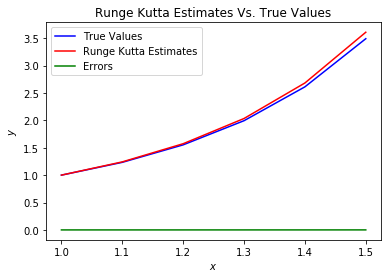

In [5]:
# present your work for part (b) and (c)
trueVals = Y(xvals)
print trueVals
estimateVals = rungeKutta(f, h)
print estimateVals
print error
plt.plot(xvals, trueVals, color = 'b', label = 'True Values')
plt.plot(xvals, estimateVals, color = 'r', label = 'Runge Kutta Estimates')
plt.plot(xvals, error, color = 'g', label = 'Errors')
plt.title('Runge Kutta Estimates Vs. True Values')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
# Based off the graph and the previous error test, there is a slight difference between the Runge Kutta estimate vs
# the true values. Both graphs seem to grow exponentionally. 

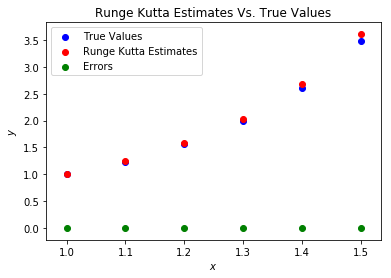

In [6]:
plt.scatter(xvals, trueVals, color = 'b', label = 'True Values')
plt.scatter(xvals, estimateVals, color = 'r', label = 'Runge Kutta Estimates')
plt.scatter(xvals, error, color = 'g', label = 'Errors')
plt.title('Runge Kutta Estimates Vs. True Values')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

**Problem 2** (20 pts): 

Let $K$ be the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[a,b]$, then the error bound for Simpson method $E_S$ is: 

$$E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4}$$

Let $f(x) = \cos(x-x^2)$, 

(a) Write a program to compute the maximum value of $\left \lvert f^{(4)}(x)\right\rvert$ on an interval $[0,1]$. Note that $f^{(4)}(x)$ represents the fourth derivative of the function $f(x)$.

(b) How large must the value of $n$ be in the approximation $S_n$ of $\int_0^1 f(x) \ dx$ by Simpson's rule to ensure that the absolute error is less than $10^{-4}$?

(c) Write a program to compute the integral $\int_0^1 f(x) \ dx$  using Simpson's method with the value of $n$ obtained in part (b).

(d) Write down the exact solution for $\int_0^1 f(x) \ dx$ (you don't need to show work for how you computed the exact integral).

(e) Compare the exact solution from part (d) to the computed solution from part (c). Does it agree with you estimates in part (b)?




In [7]:
#present your program for part 2(a)
def max_value(f, a, b):
    xvals = np.linspace(a, b, int(1e4))
    abosluteYvals = np.abs(f(xvals))
    K = np.max(abosluteYvals)
    return K

fp4 = lambda x: -24*(x**2)*np.sin(-x**2 + x) + 24*x*np.sin(-x**2 + x) - 12*np.cos(-x**2 + x) + np.cos(-x**2 + x)*((-2*x+1)**4) - 6*np.sin(-x**2 + x)*(-2*x+1)**2 - 6*np.sin(-x**2 + x)

print "K = " + str(max_value(fp4, 0, 1))

K = 12.428157819553439


#present your work for part 2(b) 

$$
\begin{align}
& E_S = \left\lvert \int_a^b f(x) \ dx - S_n  \right\rvert \leq \frac{(b-a)^5 K }{180 \ n^4} \\
& \implies 10^{-4} \leq \frac{(b-a)^5 K }{180 \ n^4} \\
& n^{4}10^{-4} \leq \frac{k}{180n^{4}} \\
& n^{4} \leq \frac{k10^{4}}{180} \\
& E_S < n \leq \Big(\frac{k10^{4}}{180}\Big)^{\frac{1}{4}} \\
\end{align}
$$

In [8]:
#present your answer from Simpson's method for part 2(c) 
def simpons_method_approximation(a, b, n, f):
    n = int(2*n)
    xvals = np.linspace(a, b, n+1)
    fvals = f(xvals)
    dx = float(b-a)/float(n)
    return (dx/3.)*(fvals[0] + fvals[n]+2.*np.sum(fvals[2:n-1:2])+4.*np.sum(fvals[1:n:2]))

In [9]:
#present your program for part 2(c) 
f = lambda x: np.cos(x-(x**2))
K = max_value(fp4, 0, 1)
n = ((K * (1e4)) / 180.)**(1./4.)
Sn = simpons_method_approximation(0, 1, n, f)
print "S_{n} = " + str(Sn)

S_{n} = 0.9833926633880781


present your answer for part 2(d) 
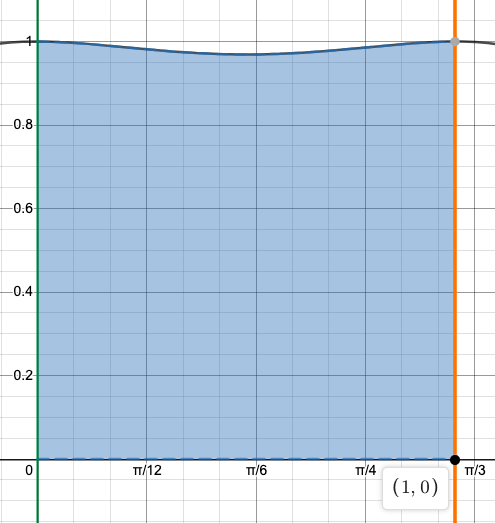

In [10]:
# I took this screenshot from https://www.desmos.com/calculator/5zk0auhgmi and used my TI-84
# calculator to find the area under curve of f(x) from x = 0 to x = 1 which came out to be 
# .98339936

In [11]:
#present your answer for part 2(e) 
exactValue = .98339936 # value from graphing calculator
Sn = simpons_method_approximation(0, 1, n, f)
Error = np.abs(exactValue - Sn)
print exactValue
print Sn
print Error

0.98339936
0.9833926633880781
6.696611921874762e-06


**Problem 3** (15 pts): Using the Secant Method, for $A>0$, 

* (10 pts) Write a program which finds $A^{1/m}$ for any positive value $m$.  Note, you need to choose a function $f(x)$ for the Secant Method whose root is $A^{1/m}$.  

* (5 pts) How does your choice of $m$ effect how many iterations your program takes to converge for a given tolerance choice?  Plots will help me to understand your thinking here.  

In [12]:
#present your program for part 3(a) 
def secant_method(m, A, x0,x1,tol):
    f = lambda x: (x**m) - A
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    counter = 0.
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        counter += 1.
    print "Number of iterations: " + str(counter)
    print "A root of f(x) is: %1.15f" %x2

In [13]:
#present your answer for part 3(b) 
def num_of_iterations_secant_method(m, x0,x1,tol):
    f = lambda x: (x**2) - 2**m
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    counter = 0.
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        counter += 1.
    return counter

In [14]:
#present your answer for part 3(b) - CONTINUED
m = 2
A = 2.
x0 = 1.5
x1 = 1.75
tol = 1e-4

secant_method(m, A, x0, x1, tol)

Number of iterations: 3.0
A root of f(x) is: 1.414213563344105


Text(0,0.5,'Number of Iterations')

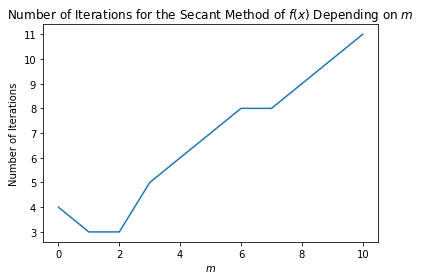

In [15]:
#present your answer for part 3(b) - CONTINUED
mvals = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])
yvals = [num_of_iterations_secant_method(jj, x0, x1, tol) for jj in mvals]
plt.plot(mvals, yvals)
plt.title('Number of Iterations for the Secant Method of $f(x)$ Depending on $m$')
plt.xlabel('$m$')
plt.ylabel('Number of Iterations')

**Problem  4** (15 pts): So, associated with Chebyshev spacing or the Chebyshev nodes are Chebyshev polynomials, which for $-1\leq x \leq 1$ are defined to be $T_{n}(x)$ where

$$
T_{n}(x) = \cos\left(n \cos^{-1}(x) \right), ~ n=0, 1, ...
$$

We see that 

$$
T_{0}(x) = 1, ~ T_{1}(x) = x
$$

Now:

(a) (3 pts) Letting $\theta = \cos^{-1}(x)$, so that $T_{2}(x)=\cos(2\theta)$ and $T_{1}(x) = x = \cos(\theta)$, and using 

$$
\cos(2\theta) = \cos^{2}(\theta) - \sin^{2}(\theta), 
$$

and 

$$
\sin^{2}(\theta) = 1 - \cos^{2}(\theta), 
$$

show that 

$$
T_{2}(x) = 2x^{2} - 1 
$$
(b) (3 pts) Letting $\theta = \cos^{-1}(x)$, so that $T_{n}(x)=\cos(n\theta)$, and using 

\begin{align*}
T_{n+1}(x) = \cos((n+1)\theta) = & \cos(n\theta)\cos(\theta) - \sin(n\theta)\sin(\theta)\\
& \\
\sin(n\theta) = & \sin((n-1)\theta)\cos(\theta) + \cos((n-1)\theta)\sin(\theta)\\
& \\
\sin((n-1)\theta)\sin(\theta) = & \cos((n-1)\theta)\cos(\theta) - \cos(n\theta) 
\end{align*}

show that 

$$
T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x)
$$

Using this and a brief induction argument, show that $T_{n}(x)$ is an $n^{th}$-order polynomial.

(c) (2 pts) Show that the $n+1$ roots of $T_{n+1}(x)$ are given by the Chebyshev nodes 

$$
x_{j} = \cos\left(\pi\frac{2j+1}{2n+2} \right),  ~ j=0,\cdots, n
$$

Thus, if we use the recurence relation above and the Fundamental Theorem of Algebra, we see that 

$$
T_{n+1}(x) = 2^{n}\prod_{j=0}^{n}\left(x - x_{j}\right).
$$

Therefore, when we write the Lagrange Interpolating Polynomial, $P_{n}(x)$, which interpolates the data $\left\{x_{j}, f_{j}\right\}_{j=0}^{n}$, we have that 

\begin{align}
P_{n}(x) = & \sum_{j=0}^{n} f_{j}L_{j}(x)\\
= & \frac{1}{2^{n}}\sum_{j=0}^{n}\frac{f_{j}}{c_{j}}\frac{T_{n+1}(x)}{x-x_{j}}, ~ c_{j} = \prod_{l=0,l\neq j}^{n}\left(x_{j}-x_{l}\right)
\end{align}

From this then, we can build an approximation to differentiation using Chebyshev nodes by finding

$$
\left.\frac{dP_{n}}{dx}\right|_{x=x_{k}} = \frac{1}{2^{n}}\sum_{j=0}^{n}\frac{f_{j}}{c_{j}}\left.\frac{d}{dx}\left(\frac{T_{n+1}(x)}{x-x_{j}}\right)\right|_{x=x_{k}}
$$

Using some effort (which you do not need to recreate), we then have that 

$$
\left.\frac{dP_{n}}{dx}\right|_{x=x_{k}} = \frac{(n+1)(-1)^{k}}{2^{n}\tilde{x}_{k}}\sum_{j=0}^{n}\frac{d_{kj}}{c_{j}}f_{j}, 
$$

where

$$
\tilde{x}_{k} = \sin\left(\pi \frac{2k+1}{2n+2} \right), ~ c_{j} = \prod_{l=0,l\neq j}^{n}\left(x_{j}-x_{l}\right).
$$

and 

$$
d_{kj} = \left\{\begin{array}{rl}
\frac{x_{k}}{2(1-x_{k}^{2})} & j = k \\
\frac{1}{x_{k}-x_{j}} & j\neq k
\end{array}
\right.
$$

Now, for given data $\left\{x_{j}, f_{j} \right\}_{j=0}^{n}$

(d) (4 pts) Write a program which implements the above approximation for $f'(x)$ over the Chebyshev nodes.  Note, you may want to try to store the necessary information in a matrix and then use matrix-vector multiplication to compute your result.  Otherwise, just use nested for loops.  

(e) (3 pts) For the function $f(x)=1/(1+x^{2})$, determine the maximum error in your approximation of the derivative over the interval $-1\leq x \leq 1$ as you vary the number of interpolation points $n+1$.  

#present your work for part 4(a) 
$$
\begin{align}
& T_{2}(x) = \cos(2\theta) \\
& = \cos^{2}(\theta) - \sin^{2}(\theta) \\
& = \cos^{2}(\theta) - \Big(1-\cos^{2}(\theta)\Big) \\
& = \cos^{2}(\theta) + \cos^{2}(\theta) - 1 \\
& = 2\cos^{2}(\theta) - 1 \\
& T_{2}(x) = 2x^{2} - 1 \\
\end{align}
$$

#present your work for part 4(b) 

$$
\begin{align}
& T_{n+1}(x) = \cos((n+1)\theta) \\
& = \cos(n\theta)\cos(\theta) - \sin(n\theta)\sin(\theta) \\
& = \cos(n\theta)\cos(\theta) - \big[\sin((n-1)\theta)\cos(\theta) + \cos((n-1)\theta)\sin(\theta)\big]\sin(\theta) \\
& = \cos(n\theta)\cos(\theta) - \big[\sin((n-1)\theta)\sin(\theta)\cos(\theta)+\cos((n-1)\theta)\sin^{2}(\theta)\big] \\
& = \cos(n\theta)\cos(\theta) - \big[\big[\cos(n-1)\theta)\cos(\theta) - \cos(n\theta)\big]\cos(\theta) + \cos((n-1)\theta)\sin^{2}(\theta)\big] \\
& = \cos(n\theta)\cos(\theta) - \big[\cos(n-1)\theta)\cos^{2}(\theta) - \cos(n\theta)\cos(\theta) + \cos((n-1)\theta)\sin^{2}(\theta)\big] \\
& = 2\cos(n\theta)\cos(\theta) - \cos((n-1)\theta)(cos^{2}(\theta) + sin^{2}(\theta)) \\
\end{align}
$$

$$
\begin{align}
& \text{ Base case (} n=1 \text{):} \\
& T_{1}(x) = \cos(\cos^{-1}(x)) = x \\
\end{align}
$$

$$
\begin{align}
& \text{ Induction case (} n = n+1 \text{):} \\
& T_{n+1}(x) = \cos((n+1)\cos^{-1}(x)) \\
& = \cos(n\cos^{-1}(x) + cox^{-1}(x)) \\
& = \cos(n\cos^{-1}(x))\cos(\cos^{-1}(x)) - \sin(n\cos^{-1}(x))\sin(\cos^{-1}(x)) \\
& = \cos(n\cos^{-1}(x))x - \sin(n\cos^{1}(x))\sin(\cos^{-1}(x))\\
\end{align}
$$

$$
\begin{align}
& T_{n+1}(x) + T_{n-1}(x) = 2\cos(n\cos^{-1}(x))x \\
& T_{n+1}(x) + T_{n-1}(x) = 2T_{n}(x)\\
& \implies T_{n+1}(x) = 2xT_{n}(x) - T_{n-1}(x) \\
\end{align}
$$

#present your work for part 4(c) 
$$
\begin{align}
& \cos(\theta) = 0 ~~when ~~\theta = (2j+1)\frac{\pi}{2} \\
& \implies (n+1)\cos^{-1}(x) = (2j+1)\frac{\pi}{2} \\
& \cos^{-1}(x) = \frac{(2j+1)\pi}{2(n+1)} \\
& \cos\Big(\cos^{-1}(x)\Big) = \cos\Big(\frac{(2j+1)\pi}{2(n+1)}\Big) \\
& x = \cos\Big(\pi\frac{(2j+1)}{2n+2)}\Big)
\end{align}
$$

In [16]:
#present your work for part 4(d) 

In [17]:
#present your work for part 4(e) 